In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py

import richio
richio.plots.use_nice_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
snap = richio.load('/home/hey4/rich_tde/data/raw/BaseTDEComptonGrayMPIR1M1BH10000beta2S60n3ComptonLowResNewAMRRemoveCenter/snap_48.h5')

/zfsstore/user/hey4/rich_tde/richio/simdata.py:39: UserWarning: Non-star spurious gas detected. Consider using only star particles with: data = obj[obj.star_ratio_filter()]
  warnings.warn(


In [29]:
snap.keys()

['Box',
 'Cycle',
 'Time',
 'CMx',
 'CMy',
 'CMz',
 'Density',
 'Dissipation',
 'DpDx',
 'DpDy',
 'DpDz',
 'DrhoDx',
 'DrhoDy',
 'DrhoDz',
 'DsieDx',
 'DsieDy',
 'DsieDz',
 'Eg_0',
 'Erad',
 'ID',
 'InternalEnergy',
 'Pressure',
 'Temperature',
 'Volume',
 'Vx',
 'Vy',
 'Vz',
 'X',
 'Y',
 'Z',
 'divV',
 'stickers',
 'tracers']

In [30]:
f = snap['Density']
x = snap['CMx']
y = snap['CMy']
z = snap['CMz']
star = snap['tracers/Star']
# sort it
sortid = np.argsort(f)
f = f[sortid]
x = x[sortid]
y = y[sortid]
z = z[sortid]
star = star[sortid]

In [31]:
snap['Box']

unyt_array([-57.88127356, -45.94537968, -43.37552245,  42.69444032,
        44.05428216,  44.00764804], 'Rsun')

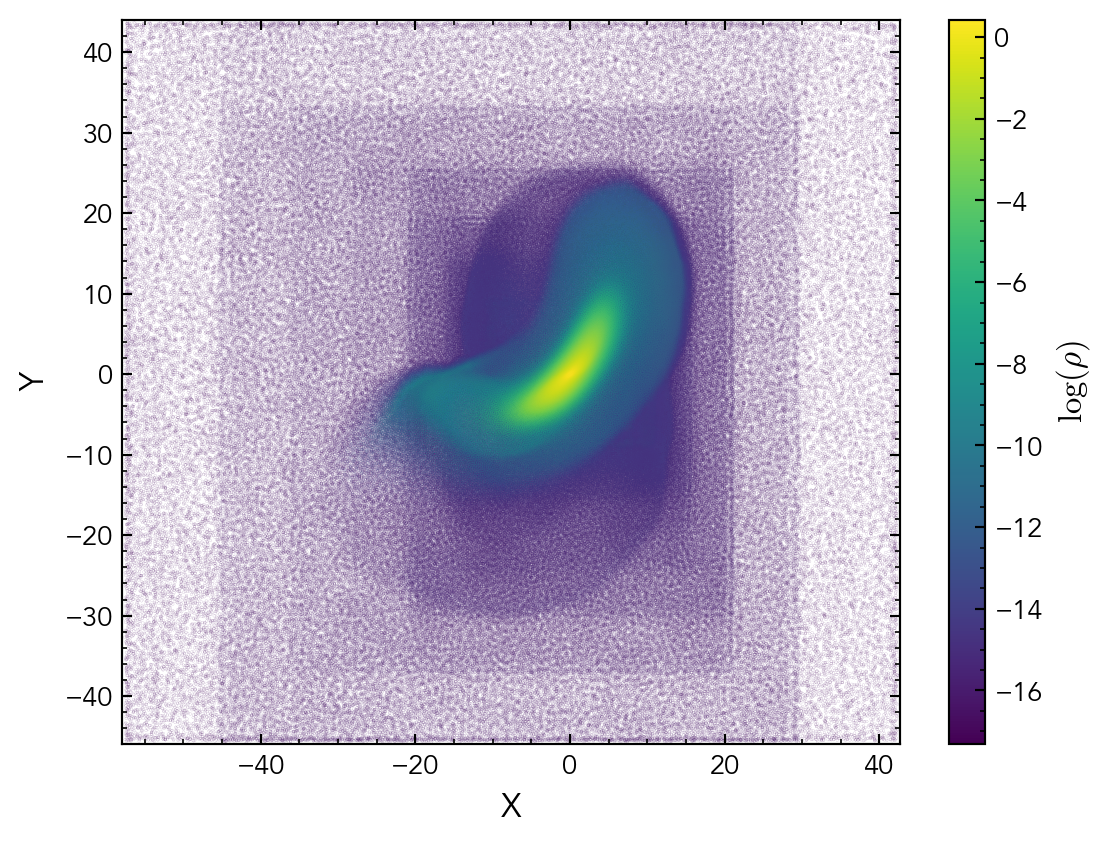

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x=x, y=y, c=np.log10(f), s=0.001)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(snap['Box'][0], snap['Box'][3])
plt.ylim(snap['Box'][1], snap['Box'][4])
plt.colorbar(label='$\\log(\\rho)$')
plt.show()

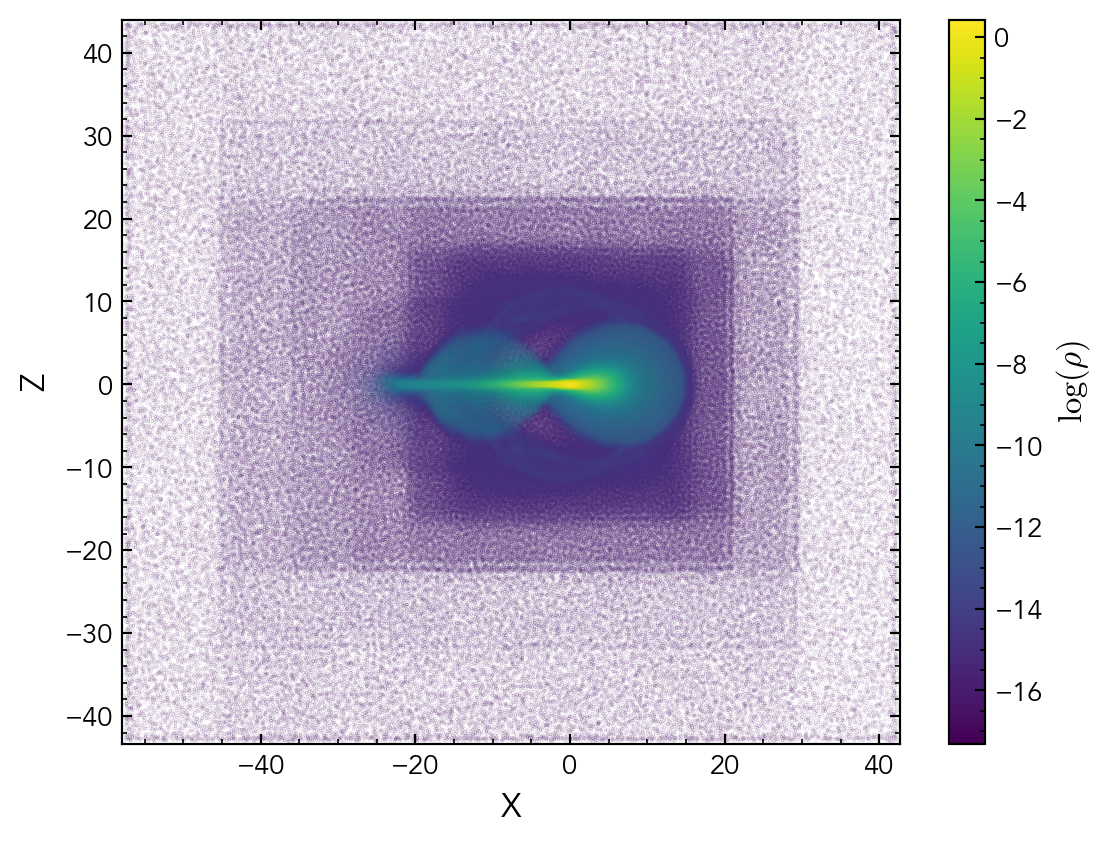

In [33]:
plt.scatter(x=x, y=z, c=np.log10(f), s=0.001)
plt.xlabel('X')
plt.ylabel('Z')
plt.xlim(snap['Box'][0], snap['Box'][3])
plt.ylim(snap['Box'][2], snap['Box'][5])
plt.colorbar(label='$\\log(\\rho)$')
plt.show()

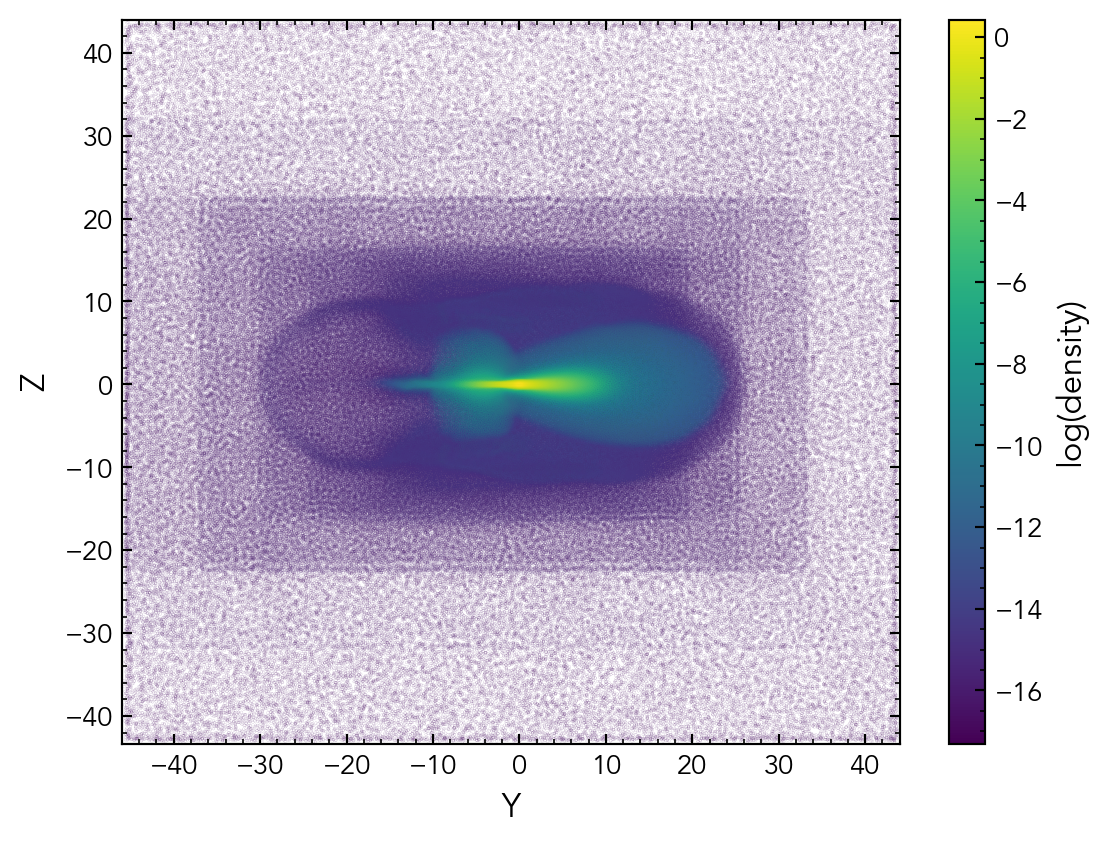

In [34]:
plt.scatter(x=y, y=z, c=np.log10(f), s=0.001)
plt.xlabel('Y')
plt.ylabel('Z')
plt.xlim(snap['Box'][1], snap['Box'][4])
plt.ylim(snap['Box'][2], snap['Box'][5])
plt.colorbar(label='log(density)')
plt.show()

## 'Star' condition

In [35]:
filter = snap.star_ratio_filter()
filter = filter[sortid]
f = f[filter]
x = x[filter]
y = y[filter]
z = z[filter]

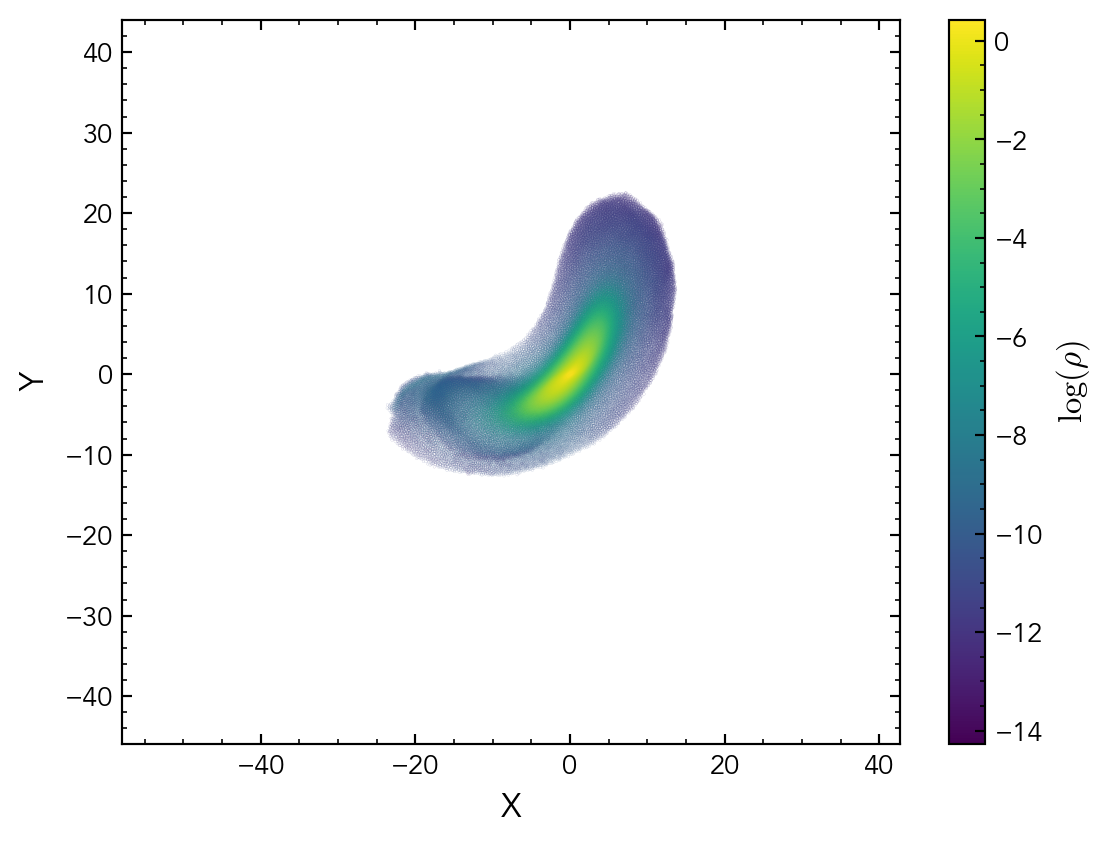

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x=x, y=y, c=np.log10(f), s=0.001)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(snap['Box'][0], snap['Box'][3])
plt.ylim(snap['Box'][1], snap['Box'][4])
plt.colorbar(label='$\\log(\\rho)$')
plt.show()

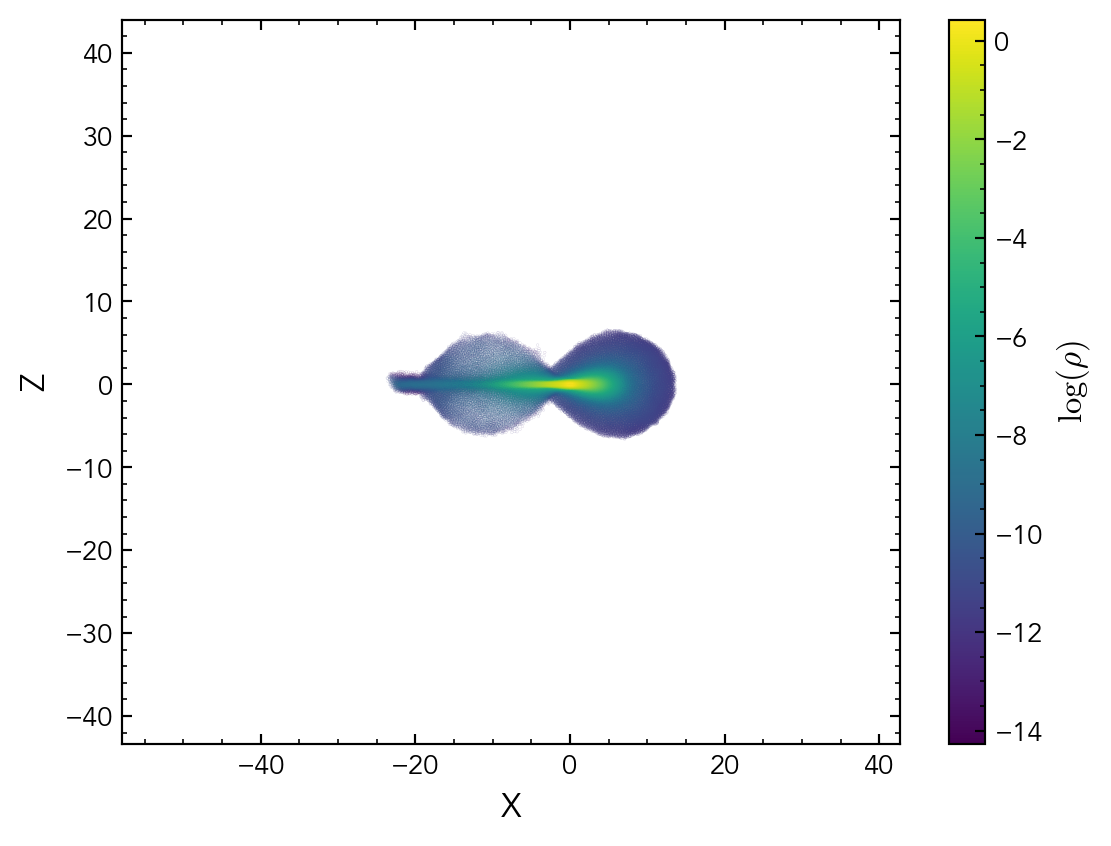

In [37]:
plt.scatter(x=x, y=z, c=np.log10(f), s=0.001)
plt.xlabel('X')
plt.ylabel('Z')
plt.xlim(snap['Box'][0], snap['Box'][3])
plt.ylim(snap['Box'][2], snap['Box'][5])
plt.colorbar(label='$\\log(\\rho)$')
plt.show()

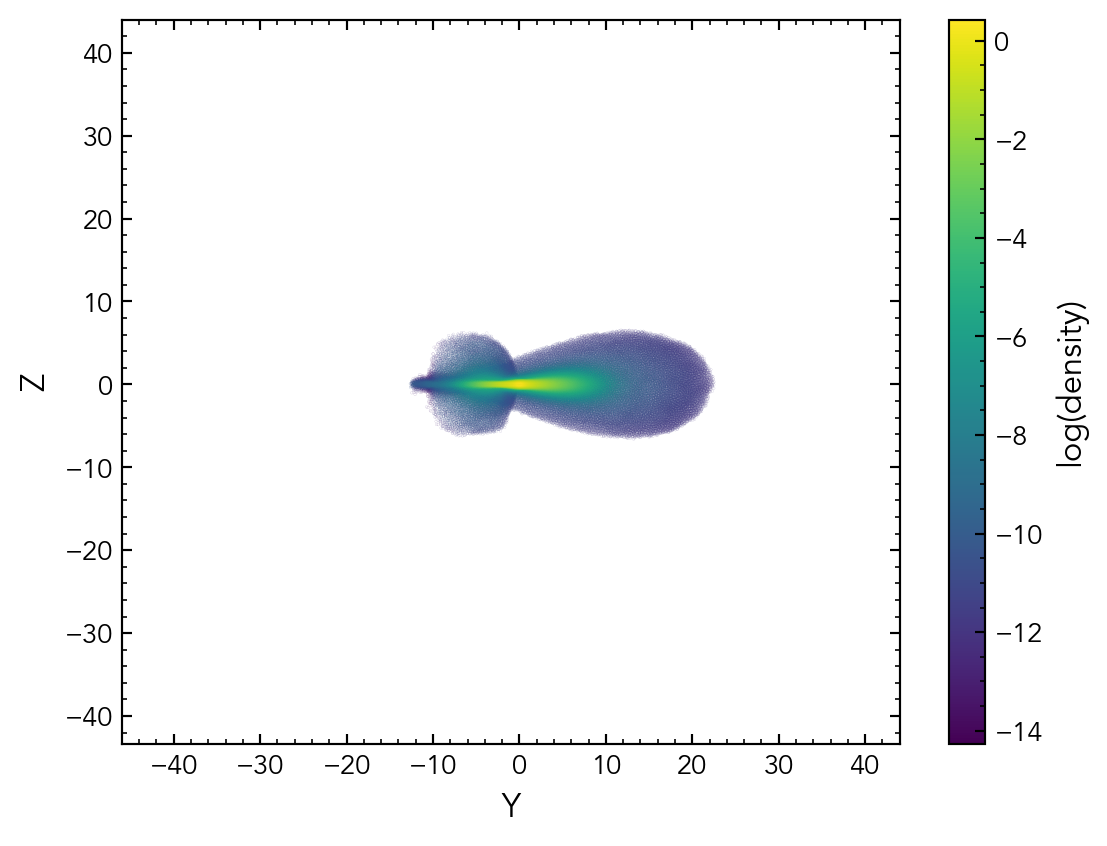

In [38]:
plt.scatter(x=y, y=z, c=np.log10(f), s=0.001)
plt.xlabel('Y')
plt.ylabel('Z')
plt.xlim(snap['Box'][1], snap['Box'][4])
plt.ylim(snap['Box'][2], snap['Box'][5])
plt.colorbar(label='log(density)')
plt.show()

## Plotting

In [39]:
# H, xedges, yedges = np.histogram2d(x=x, y=y, weights=f, bins=512)

In [40]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# X, Y = np.meshgrid(xedges[:-1], yedges[:-1], indexing='ij')
# ax.pcolormesh(X, Y, np.log10(H))
# ax.set_xlim(-1e12, 1e12)
# ax.set_ylim(-1e12, 1e12)
# plt.show()